# Python assignment & Collaboration with Dr X

Note: I recieved good advice from Beulah in working through this assignment. She was very helpful and I appreciate her assistance. 


# First import all the essential packages 
Biopython is essential to run the following codes. If it is not installed on your device, please install it now. 

In [53]:
conda install biopython

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import Bio
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Data import CodonTable
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord 
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis

We will create three objects: 

cytb_seqs : the sequences for each penguin species

pen_mass: A small dataframe including only penguin species and body mass

pen_species: Just a list of penguin species taken from the pen_mass dataframe

In [55]:
cytb_seqs = SeqIO.parse('penguins_cytb.fasta', 'fasta') #this reads the "penguins_cytb.fasta" into an object called "cytb_seqs"
#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #we read the sequences from the "penguins_cytb.fasta" into cytb_seqs

In [56]:
pen_mass = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
pen_species = list(pen_mass.species) # list the different species of penguins

In [57]:
for cytb_seqs in SeqIO.parse('penguins_cytb.fasta', 'fasta'): #print the seq ID, description, part of the sequence and length
    print(cytb_seqs.id)  
    print(cytb_seqs.description)
    print(repr(cytb_seqs.seq)) 
    print(len(cytb_seqs)) 

AB026282
AB026282 Aptenodytes forsteri mitochondrial gene for cytochrome b, complete cds, haplotype:a
Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA')
1143
AF076044
AF076044 Aptenodytes patagonicus cytochrome b (cytb) gene, mitochondrial gene encoding mitochondrial protein, complete cds
Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA')
1143
AF076051
AF076051 Eudyptes chrysocome cytochrome b (cytb) gene, mitochondrial gene encoding mitochondrial protein, complete cds
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
1143
AF076052
AF076052 Eudyptes chrysolophus cytochrome b (cytb) gene, mitochondrial gene encoding mitochondrial protein, complete cds
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
1143
AB026277
AB026277 Eudyptes sclateri mitochondrial gene for cytochrome b, complete cds
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
1143
AB026278
AB026278 Eudyptula minor mitochondrial gene for 

## Next, let's take a closer look at the fasta data which we are working with.



In [58]:
for cytb_seqs in SeqIO.parse('penguins_cytb.fasta', 'fasta'):
    #the above line reads the original penguins_cytb.fasta file in fasta format using the SeqIO package. 
    print(cytb_seqs.id)  #From that fasta file, print the 'ID'
    print(repr(cytb_seqs.seq)) #and print the 'seq', so we can see what we have. 

AB026282
Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA')
AF076044
Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA')
AF076051
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
AF076052
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
AB026277
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')
AB026278
Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA')
AB066603
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA')
AF076089
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG')
AF076090
Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG')
AB026269
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')
AB026271
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')
AB026270
Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')


Then read the "mito_table" from the CodonTable object provided by BioPython. Let's take a look at it as well. This object will be used for a future function and is also a generally educational object for reference. 

In [59]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
#this finds a CodonTable from Biopython and reads part of it into our mito_table object
print(mito_table) #prints the table 

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

# 1 Sequence retrieval function
This function is essential for moving forward with the project. We will use it to locate the sequences from our fasta file and return them to a data dictionary. 

In [60]:
def get_sequences_from_file(fasta_fn): #this is the function title, which we will call later when we need to use it
    sequence_data_dict = {} #the function will output a sequence data dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"):#use the fasta function on a fasta-format file
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)#when we run this function, it will return a data dictionary

# 2 "Translate string" function
This function translates nuculeotide sequences to amino acids. We will break the string of nucleotides into three-nucleotide chunks, which are then translated into amino acids. 

In [61]:
def translate_function(string_nuc): #the following code defines the translate function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #use the mito_table as a codon key
    aa_string = [] # create a blank list where we will put the amino acids
    for nuc in range(0, len(string_nuc),3): 
        codon = string_nuc[nuc:nuc +3] #Break it into 3-nucleotide peices
        
        if codon == 'AGA' or codon == 'AGG'  or codon == 'TAA' or codon == 'TAG':
            break # Break the line if you encounter a stop codon
        else: #but if you don't find a stop codon:
            aa = mito_table.forward_table[codon] #take the amino acid from the mito_table
            aa_string.append(aa) # and append it to the aa string       
       
    return "".join(aa_string) #After doing all this, return the amino acid string

# 3 Alternative "translate string" function
This function goes about translating nucleotide strings to amino acid sequences. 
This code is credit: https://biopython.org/wiki/ProtParam

In [62]:
seq1 = 'cytb_seqs.Seq' #make an object out of the "Seq" line of our cytb_seqs fasta object. 
my_seq = ( seq1     #feed the object into the object specified by the biopython function
 )
analysed_seq = ProteinAnalysis(my_seq) #perform the "ProteinAnalysis" on the my_seq objet
                                        #and feed results into "analysed_seq" object
analysed_seq.count_amino_acids() #count number of amino acids in the "analysed_seq" object

{'A': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 1,
 'T': 0,
 'V': 0,
 'W': 0,
 'Y': 0}

This code is actually quite useful. We now have the actual count of all the amino acids in our nucleotide sequences from the "cytb_seqs" object. 

# 4 Molecular weight function
This function uses code taken from the Bio.SeqUtils.ProtParam module to calculate amino acid's molecular weight. 

In [63]:
def compute_molecular_weight(aa_seq):#define the compute_molecular_weight function
    mol_weight = ProteinAnalysis(aa_seq).molecular_weight()
    #The molecular weight taken from the aa_seq using the ProteinAnalysis function. 
    return mol_weight #after computing, it returns molecular weight

# 5 GC Content function

This function calculates and returns the percent GC content of each sequence. 

In [64]:
def GC_content(cytb_seqs): #the following code works with the GC_content of the cytb_seqs object
    count = 0 #begin the count at 0
    for base in cytb_seqs:
        if base == 'G' or base == 'C':
            count+=1 #Count up one whenever encountering a G or C
    perce = count/len(cytb_seqs)*100 # calculate the percent GC content
    
    return (perce)


# 6 Add molecular weight and GC content
Next step is to make a couple of new, empty columns in a new version of the pen_mass dataframe so that the GC content and molecular weight have a place to go.

In [65]:
pen_mass # view the dataframe 

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [66]:
pen_percent = pen_mass.assign(molecular_weight = 'NaN', GC_content='NaN') #make a new dataframe: pen_percent
#this code makes a molecular_weight and a GC_content column and populates them with "NaN" 
#to indicate that they are intentionally empty. 

In [67]:
pen_percent #view the new dataframe (pen_percent)

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# 7 GC content and molecular weight for-loop
Next we write a for-loop which loops through the nucleotide sequence of each species and computes both the percent GC content for the entire sequence, and the molecular weight for each amino acid. 

In [68]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #make sure we are working with the sequences from
                                                            #the original fasta file. 

for key, value in cytb_seqs.items(): 
    aa_seq = translate_function(value)
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_perce = GC_content(value)
    
    for index, row in pen_percent.iterrows():
        if row['species'] == key:
            pen_percent.loc[index, 'molecular_weight'] = molecular_weight
            pen_percent.loc[index, 'GC_content'] = GC_perce
            

Now pen_percent contains a column (GC_content) which contains the percent GC content of each species's sequence. Take a moment to view pen_percent:

In [69]:
pen_percent

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


# 8 Mass by species bar chart 
Now lets's visualize some of our results. First, make a bar chart representing the mass of each species. 

In [70]:
plot_dims = (14, 9) #set the dimensions of the plot 

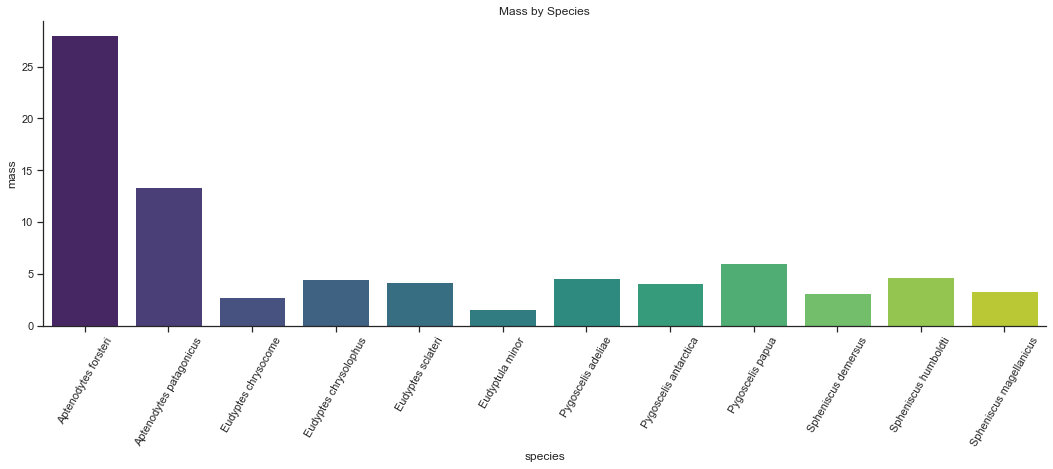

In [71]:
species_mass = sns.catplot(data=pen_percent, x="species", y="mass", kind="bar", aspect=3, palette="viridis").set(title='Mass by Species')
#species will be plotted on x axis, mass on y axis. This is a bar chart with colors taken from the viridis palette. 
species_mass.set_xticklabels(rotation=60)#puts the x axis labels at an angle for readability 
#The label rotation code was sourced from https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/

The smallest of our penguin species is "Eudyptula minor". This penguin is found in New Zealand, parts of Austrailia, and possibly in Chile. The common name is "little blue penguin". 

# 9  Plot of molecular weight by GC content
Finally, we will plot the molecular weight by GC content. This is interesting to see how the GC content and molecular weight of each amino acid relate to each other. 
This code is based off: https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/

/Users/gcarey1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '47.15660542432196'),
 Text(1, 0, '47.76902887139108'),
 Text(2, 0, '48.20647419072616'),
 Text(3, 0, '48.29396325459317'),
 Text(4, 0, '48.38145231846019'),
 Text(5, 0, '49.08136482939632'),
 Text(6, 0, '49.256342957130364'),
 Text(7, 0, '49.69378827646544'),
 Text(8, 0, '50.83114610673666'),
 Text(9, 0, '50.91863517060368'),
 Text(10, 0, '51.181102362204726')]

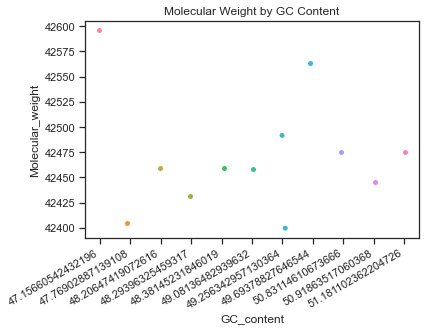

In [72]:
x = pen_percent.GC_content
y = pen_percent.molecular_weight
ax = sns.stripplot(x, y);
ax.set(xlabel = 'GC_content', ylabel ='Molecular_weight')
plt.title('Molecular Weight by GC Content');
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

# 10 Export the new dataframe to a csv
The next step is to take our dataframe which now has GC content and molecular weight and export it to a csv. The csv will be named "penguin_final.csv". 

In [73]:
pen_percent.to_csv("penguin_final.csv", index = False) #This outputs our penguin file to a csv titled "penguin_final.csv"

This concludes our collaboration, Dr X. I look forward to future projects.  